<h1><center>DSO-510 Project</center></h1>

<h1><center>IBM Employee Attrition Analysis</center></h1>

<img src="https://cdn.smartkarrot.com/wp-content/uploads/2020/10/Customer-Attrition.png" style="width:800px;height:400px"/>

### Importing necessary Libraries

In [1]:
# Python libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as pylab
import matplotlib
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

###  Importing the Data

In [2]:
import pandas as pd

data = pd.read_csv("Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Checking for null values in the dataset

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Dropping useless columns

In [4]:
data.drop(['EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)

### Correlation Matrix

In [5]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


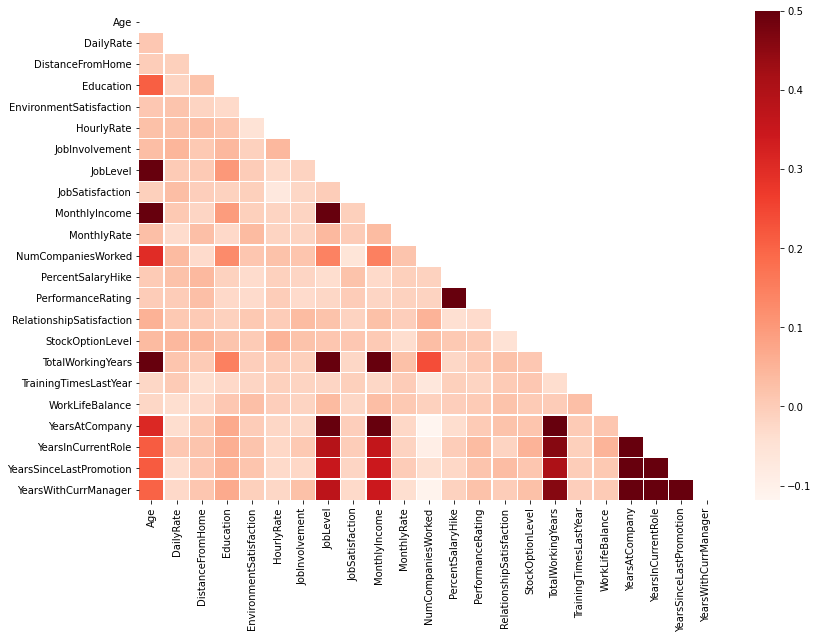

In [6]:
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="Reds")
plt.show()

## EXPLORING DIFFERENT DATA VARIABLES AGAINST ATTRITION

### 1. Counting the number of Attritions

In [7]:
data_Attrition = pd.DataFrame(columns=["Attrition", "Attrition percent"])
l=0
for i in list(data['Attrition'].unique()):
    r = data[data['Attrition'] == i].shape[0] / data.shape[0]
    data_Attrition.loc[i] = (i, r*100)
    l += 1
#     print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
dataat = data_Attrition.groupby(by="Attrition").sum()
print(dataat)
print(data['Attrition'].unique())
# data_Attrition.plot(kind='bar',title='Attrition Distribution(%)')
fig = px.bar(dataat, y='Attrition percent',color='Attrition percent', title='Percent of Attrition Variable',  text='Attrition percent')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

           Attrition percent
Attrition                   
No                 83.877551
Yes                16.122449
['Yes' 'No']


### 2. Gender and Attrition 

In [8]:
# Gender of employees
data_g = pd.DataFrame(columns=["Gender", "Attrition percent"])
l=0
for i in list(data['Gender'].unique()):
    r = data[(data['Gender']==i)&\
             (data['Attrition']=="Yes")].shape[0] / data[data['Gender']==i].shape[0]
    data_g.loc[i] = (i, int(r*100))
    l += 1
datag = data_g.groupby(by="Gender").sum()
fig = px.bar(datag, y='Attrition percent',color='Attrition percent', title='Attrition percent against Gender of Employees'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### 3. Distribution of Age with Attrition 

In [9]:
fig = px.histogram(data, x="Age", color="Attrition", title= 'Distribution of Age with Attrition',\
                  marginal='box')
fig.show()

### 3. Distribution of Education with Attrition


In [10]:
fig = px.histogram(data, x='EducationField', color='Attrition', title='Distribution of Education with Attrition')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### 4. Attrition percent against Marital Status 

In [11]:
data_m = pd.DataFrame(columns=["Marital Status", "Attrition percent"])
l=0
for i in list(data['MaritalStatus'].unique()):
    r = data[(data['MaritalStatus']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['MaritalStatus']==i].shape[0]
    data_m.loc[i] = (i, int(r*100))
    l += 1
datam = data_m.groupby(by="Marital Status").sum()
fig = px.bar(datam, y='Attrition percent',color='Attrition percent', title='Attrition percent against Marital Status'\
            , text= 'Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### 5. Attrition Percent against BusinessTravel


In [12]:
data_bt = pd.DataFrame(columns=["Business Travel", "Attrition percent"])
l=0
for i in list(data['BusinessTravel'].unique()):
    r=data[(data['BusinessTravel']==i)&\
               (data['Attrition']=="Yes")].shape[0] / data[data['BusinessTravel']==i].shape[0]
    data_bt.loc[l] = (i, int(r*100))
    l+=1
databt=data_bt.groupby(by="Business Travel").sum()
fig = px.bar(databt, y='Attrition percent',color='Attrition percent', title='Attrition Percent against BusinessTravel'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()


### 6. Percent of Attrition for different Job Role

In [13]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [14]:
data_jr = pd.DataFrame(columns=["Job Role", "Attrition percent"])
l=0
for i in list(data['JobRole'].unique()):
    r=data[(data['JobRole']==i)&\
               (data['Attrition']=="Yes")].shape[0] / data[data['JobRole']==i].shape[0]
    data_jr.loc[l] = (i, int(r*100))
    l+=1
datajr=data_jr.groupby(by="Job Role").sum()
fig = px.bar(datajr, y='Attrition percent',color='Attrition percent', title='Percent of Attrition for different Job Role'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


### 7. Percent of Attrition for different Job Level

In [15]:
#Job Level
data_jl = pd.DataFrame(columns=["Job Level", "Attrition percent"])
l=0
for i in list(data['JobLevel'].unique()):
    r = data[(data['JobLevel']==i)&\
             (data['Attrition']=="Yes")].shape[0] / data[data['JobLevel']==i].shape[0]
    data_jl.loc[l] = (i, int(r*100))
    l += 1
datajl = data_jl.groupby(by="Job Level").sum()
fig = px.bar(datajl, y='Attrition percent',color='Attrition percent', title='Attrition percent for different Job Levels'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### 8. Percent of Attrition for different levels of Job Involvement

In [16]:
#Job Involvement

data_ji = pd.DataFrame(columns=["Job Involvement", "Attrition percent"])
l=0
for i in list(data['JobInvolvement'].unique()):
    r = data[(data['JobInvolvement']==i)&\
             (data['Attrition']=="Yes")].shape[0] / data[data['JobInvolvement']==i].shape[0]
    data_ji.loc[i] = (i, int(r*100))
    i += 1
dataji = data_ji.groupby(by="Job Involvement").sum()
fig = px.bar(dataji, y='Attrition percent',color='Attrition percent', title='Attrition percent against Job Involvement'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tick0=1, dtick=1)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### 9a. Attrition against Training Time

In [17]:
x1 = data.loc[data['Attrition'] == 'Yes', 'TrainingTimesLastYear']
x2 = data.loc[data['Attrition'] == 'No', 'TrainingTimesLastYear']
hist_data = [x1, x2]

group_labels = ['Attrition = Yes', 'Attrition = No']
colors=['blue','red']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,colors=colors)
fig.update_layout(title_text='Training Time')

fig.show()

### 9b. Attrition percent for different Training Times

In [18]:
data_tt = pd.DataFrame(columns=["Training Times", "Attrition percent"])
l=0
for i in list(data['TrainingTimesLastYear'].unique()):
    r = data[(data['TrainingTimesLastYear']==i)&\
             (data['Attrition']=="Yes")].shape[0] / data[data['TrainingTimesLastYear']==i].shape[0]
    data_tt.loc[i] = (i, int(r*100))
    i += 1
datatt = data_tt.groupby(by="Training Times").sum()
fig = px.bar(datatt, y='Attrition percent',color='Attrition percent', title='Attrition percent for different Training Times'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tick0=1, dtick=1)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### 10. Attrition against Number of Companies Worked

In [19]:
#Number of Companies worked

data_ncw = pd.DataFrame(columns=["Num Companies Worked", "Attrition percent"])
l=0
for i in list(data['NumCompaniesWorked'].unique()):
    r = data[(data['NumCompaniesWorked']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['NumCompaniesWorked']==i].shape[0]
    data_ncw.loc[i] = (i, r*100)
    l += 1
datancw = data_ncw.groupby(by="Num Companies Worked").sum()
fig = px.bar(datancw, y='Attrition percent',color='Attrition percent', title='Attrition percent against Number of Companies Worked'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 11a. Count of Years at company

In [20]:
print("Number of Years at the company varies from {} to {} years.".format(
    data['YearsAtCompany'].min(), data['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


### 11b. Attrition against of Years at Company

In [21]:
fig = px.histogram(data, x="YearsAtCompany", color="Attrition", marginal="box")
fig.update_layout(title_text='Years at company')
fig.show()

### 12a. Count of Years in the Current Role

In [22]:
print("Number of Years in the current role varies from {} to {} years.".format(
    data['YearsInCurrentRole'].min(), data['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


### 12b. Attrition against Years in the Current Role

In [23]:
fig = px.histogram(data, x="YearsInCurrentRole", color="Attrition", marginal="box")
fig.update_layout(title_text='Years at current role')
fig.show()

### 12c. Attrition percent against Years in the Current Role

In [24]:
data_yic = pd.DataFrame(columns=["Years in Current Role", "Attrition percent"])
l=0
for i in list(data['YearsInCurrentRole'].unique()):
    r = data[(data['YearsInCurrentRole']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['YearsInCurrentRole']==i].shape[0]
    data_yic.loc[i] = (i, r*100)
    l += 1
datayic = data_yic.groupby(by="Years in Current Role").sum()
fig = px.bar(datayic, y='Attrition percent',color='Attrition percent', title='Attrition percent against Years in Current Role'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 13a. Count of Years since Last Promotion

In [25]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    data['YearsSinceLastPromotion'].min(), data['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


### 13b. Attrition against Years since Last Promotion

In [26]:
fig = px.histogram(data, x="YearsSinceLastPromotion", color="Attrition", marginal="box")
fig.show()

### 13c. Attrition Percent against Years since Last Promotion

In [27]:
data_ysp = pd.DataFrame(columns=["Years since Promotion", "Attrition percent"])
l=0
for i in list(data['YearsSinceLastPromotion'].unique()):
    r = data[(data['YearsSinceLastPromotion']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['YearsSinceLastPromotion']==i].shape[0]
    data_ysp.loc[i] = (i, r*100)
    l += 1
dataysp = data_ysp.groupby(by="Years since Promotion").sum()
fig = px.bar(dataysp, y='Attrition percent',color='Attrition percent', title='Attrition percent against Years since Last Promotion'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 14a. Total number of Working Years

In [28]:
print("Total working years varies from {} to {} years.".format(
    data['TotalWorkingYears'].min(), data['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


### 14b. Attrition against Total Working Years

In [29]:
fig = px.histogram(data, x="TotalWorkingYears", color="Attrition", marginal="box")
fig.show()

### 14c. Attrition percent against Total Working Years

In [30]:
data_twy = pd.DataFrame(columns=["Total Working Years", "Attrition percent"])
l=0
for i in list(data['TotalWorkingYears'].unique()):
    r = data[(data['TotalWorkingYears']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['TotalWorkingYears']==i].shape[0]
    data_twy.loc[i] = (i, r*100)
    l += 1
datatwy = data_twy.groupby(by="Total Working Years").sum()
fig = px.bar(datatwy, y='Attrition percent',color='Attrition percent', title='Attrition percent against Total Working Years'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 15. Attrition percent against Distance from Home

In [31]:
#Distance from Home
data_dh = pd.DataFrame(columns=["DistanceFromHome", "Attrition percent"])
l=0
for i in list(data['DistanceFromHome'].unique()):
    r = data[(data['DistanceFromHome']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['DistanceFromHome']==i].shape[0]
    data_dh.loc[i] = (i, int(r*100))
    l += 1
datadh = data_dh.groupby(by="DistanceFromHome").sum()
fig = px.bar(datadh, y='Attrition percent',color='Attrition percent', title='Attrition percent against Distance From Home'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 16. Attrition percent for different Department

In [32]:
#Department
data_dp = pd.DataFrame(columns=["Department", "Attrition percent"])
l=0
for i in list(data['Department'].unique()):
    r = data[(data['Department']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['Department']==i].shape[0]
    data_dp.loc[i] = (i, int(r*100))
    l += 1
datadp = data_dp.groupby(by="Department").sum()
fig = px.bar(datadp, y='Attrition percent',color='Attrition percent', title='Attrition percent for different Department'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 17. Department wise Count of People in an Organization

In [33]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.options.display.max_columns = None


dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
print(dept_att)
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Count of People in an Organization')
fig.show()

               Department Attrition  Counts
0         Human Resources        No      51
1         Human Resources       Yes      12
2  Research & Development        No     828
3  Research & Development       Yes     133
4                   Sales        No     354
5                   Sales       Yes      92


### 18a. Years with current Manager in the Organization

In [34]:
YWCM=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['YearsWithCurrManager'].count()).reset_index(name='Counts')
px.bar(YWCM,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Years with current Manager in the Organization')


### 18b. Attrition percent against Years with Current Manager

In [35]:
#Years with Current Manager
data_ycm = pd.DataFrame(columns=["YearsWithCurrManager", "Attrition percent"])
l=0
for i in list(data['YearsWithCurrManager'].unique()):
    r = data[(data['YearsWithCurrManager']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['YearsWithCurrManager']==i].shape[0]
    data_ycm.loc[i] = (i, int(r*100))
    l += 1
dataycm = data_ycm.groupby(by="YearsWithCurrManager").sum()
fig = px.bar(dataycm, y='Attrition percent',color='Attrition percent', title='Attrition percent against Years with Current Manager'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 19. Attrition percent against Work Life Balance

In [36]:
#Work life balance

data_wlb= pd.DataFrame(columns=["WorkLifeBalance", "Attrition percent"])
l=0
for i in list(data['WorkLifeBalance'].unique()):
    r = data[(data['WorkLifeBalance']==i)&\
             (data['Attrition']=="Yes")].shape[0] / data[data['WorkLifeBalance']==i].shape[0]
    data_wlb.loc[i] = (i, int(r*100))
    l += 1
datawlb = data_wlb.groupby(by="WorkLifeBalance").sum()
fig = px.bar(datawlb, y='Attrition percent',color='Attrition percent', title='Attrition percent against Work Life Balance'\
            , text='Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(tick0=1, dtick=1)
fig.show()

### 20. Attrition percent against Marital Status

In [37]:
data_m = pd.DataFrame(columns=["Marital Status", "Attrition percent"])
l=0
for i in list(data['MaritalStatus'].unique()):
    r = data[(data['MaritalStatus']==i)&\
                 (data['Attrition']=="Yes")].shape[0] / data[data['MaritalStatus']==i].shape[0]
    data_m.loc[i] = (i, int(r*100))
    l += 1
datam = data_m.groupby(by="Marital Status").sum()
fig = px.bar(datam, y='Attrition percent',color='Attrition percent', title='Attrition percent against Marital Status'\
            , text= 'Attrition percent')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### Creating a new DataFrame for Regression

In [38]:
df_HR=data[['Attrition','JobInvolvement','WorkLifeBalance', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole']].copy()

### Changing Attrition Variable to 1/0 for Attrition/No Attrition

In [39]:
df_HR['Attrition']=[1 if i=='Yes' else 0 for i in df_HR['Attrition']]

In [40]:
print(df_HR.shape)
df_HR.head()

(1470, 7)


,Attrition,JobInvolvement,WorkLifeBalance,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole
0,1,3,1,5993,0,8,4
1,0,2,3,5130,1,10,7
2,1,2,3,2090,0,7,0
3,0,3,3,2909,0,8,7
4,0,3,3,3468,1,6,2


In [41]:
cols=['JobInvolvement','WorkLifeBalance', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole'] 
X=df_HR[cols]
y=df_HR['Attrition']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.404409
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.084     
Dependent Variable:  Attrition        AIC:              1200.9633 
Date:                2021-12-06 14:21 BIC:              1232.7214 
No. Observations:    1470             Log-Likelihood:   -594.48   
Df Model:            5                LL-Null:          -649.29   
Df Residuals:        1464             LLR p-value:      4.9309e-22
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
JobInvolvement     -0.2461   0.0779 -3.1586 0.0016 -0.3988 -0.0934
WorkLifeBalance     0.0320   0.0764  0.4184 0.6756 -0

**Based on the p-values of all the above independent variables, we decide to drop the ones having p-value>- 0.1 as these aren't essentially describing the variability of the model largely**

In [42]:
df_HR=df_HR.drop(columns=['TotalWorkingYears', 'WorkLifeBalance'])

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()


,Attrition,JobInvolvement,MonthlyIncome,StockOptionLevel,YearsInCurrentRole
0,1.0,3.333333,1.312270,0.000000,1.111111
1,0.0,1.666667,1.085045,1.666667,1.944444
2,1.0,1.666667,0.284623,0.000000,0.000000
3,0.0,3.333333,0.500263,0.000000,1.944444
4,0.0,3.333333,0.647446,1.666667,0.555556


In [44]:
target = df_HR['Attrition'].copy()

In [45]:
df_HR.drop(['Attrition'], axis=1,  inplace=True)
df_HR.head()

,JobInvolvement,MonthlyIncome,StockOptionLevel,YearsInCurrentRole
0,3.333333,1.312270,0.000000,1.111111
1,1.666667,1.085045,1.666667,1.944444
2,1.666667,0.284623,0.000000,0.000000
3,3.333333,0.500263,0.000000,1.944444
4,3.333333,0.647446,1.666667,0.555556


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 4)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 4)
Number transactions y_test dataset:  (368,)


In [47]:
from sklearn.linear_model import LogisticRegression
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))

In [48]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.71 (0.06)
